# Image processing in the spatial domain


## Initial intuition
https://www.ft.unicamp.br/docentes/magic/khoros/html-dip/c4/s3/front-page.html

### Intensity transformations

Some of the simplest image processing operations are intensity transformations or point processing operations. Intensity transformations are image operations that operate on each pixel individually without respect to the neighbouring pixels. This is in contrast to neighbourhood processing, which assesses the neighbourhood around each pixel in order to transform it.

A simpel operation is inverting the image. With numpy this can be done easily, as all matematical operations are implicitly done on all elements of the array.

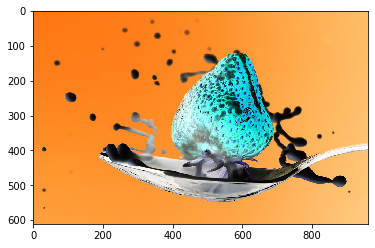

In [4]:
import numpy as np
from matplotlib import pyplot as plt
image_path = "images/strawberry.jpg"

im_array = plt.imread(image_path)
inverted = 255 - im_array
plt.imshow(inverted)
plt.show()

In intensity transforms each pixel is assigned a new color according to a scalar function:
$$c' = f(c)$$

The function f can vary alot depending on what we want to do. The following snippet displays some common mathematical operations that we can apply to images.

Log transform:


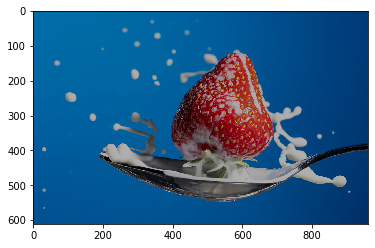

Exponential transform:


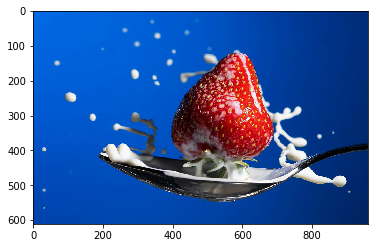

Gamma transform (gamma = 0.5):


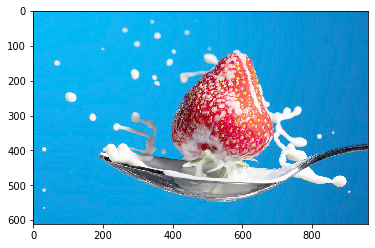

Gamma transform (gamma = 3):


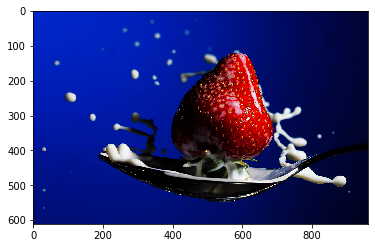

Threshold transform:


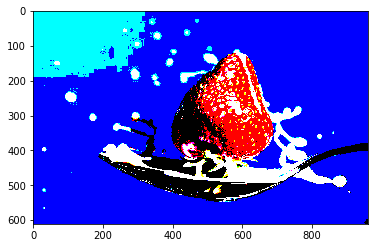

In [6]:
#First we want to convert our image from an [0, 256] uint8 array to a [0.0, 1.0] float array.
float_im = im_array/255.

log_transform = np.log(1 + float_im)
print("Log transform:")
plt.imshow(log_transform)
plt.show()

exp_transform = (np.exp(float_im) - 1)/(np.e - 1)
print("Exponential transform:")
plt.imshow(exp_transform)
plt.show()

gamma_transform = np.power(float_im, 0.5)
print("Gamma transform (gamma = 0.5):")
plt.imshow(gamma_transform)
plt.show()

gamma_transform = np.power(float_im, 3)
print("Gamma transform (gamma = 3):")
plt.imshow(gamma_transform)
plt.show()


threshold_transform = np.where(float_im > 0.5, 1.0, 0.0)
print("Threshold transform:")
plt.imshow(threshold_transform)
plt.show()

## Histogram equalization

Histogram equalization is a method used in image processing to improve contrast in images. It stretches the dynamic range for the most frequent intensity values, effectively spreading them out over the whole range of possible values. Normally this will imporve the contrast of images, brighten dark images and darken bright images.

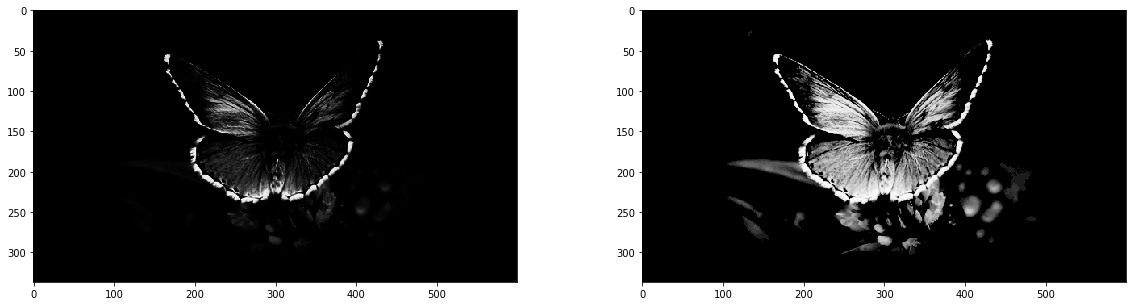

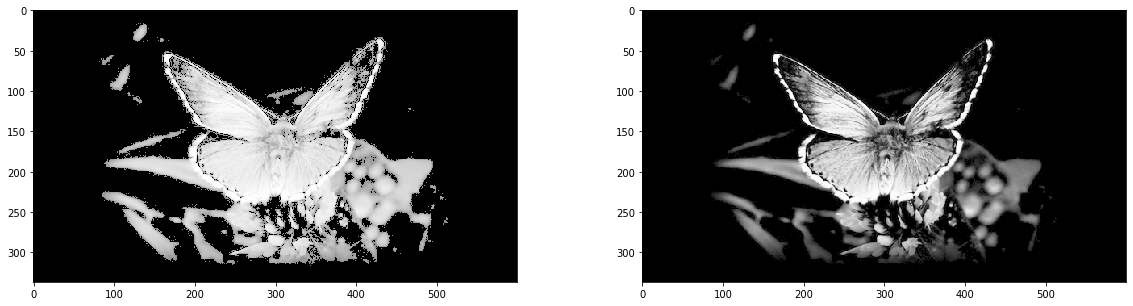

In [4]:
import numpy as np
from matplotlib import pyplot as plt
def histogram_eq(image):
    #First we calculate the histogram.
    hist, bins = np.histogram(image[:,:], 256)
    
    #Then we calculate the cumulative histogram
    cumulative_hist = np.zeros((256), dtype = np.int)
    cumulative_hist[0] = hist[0]
    for i in range(1, 256):
        cumulative_hist[i] = cumulative_hist[i-1] + hist[i]
    
    #Then we normalize the histogram to [0., 1.]
    normalized_cumulative_hist = cumulative_hist.astype(float)
    normalized_cumulative_hist /= normalized_cumulative_hist[-1]
    
    #Then we construct an intensity mapping table by multiplying with the maximum intensity value
    table = (normalized_cumulative_hist * 255).astype(np.uint8)
    
    #Lastly we create the new image by mapping each of the old intensities to the new corresponding intensity
    new_im = table[image[:,:]]
    return new_im


image = plt.imread("images/low_contrast_butterfly.tiff")[:,:,0]
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap = "gray")
image = histogram_eq(image)
plt.subplot(1,2,2)
plt.imshow(image, cmap = "gray")
plt.show()



image = plt.imread("images/high_contrast_butterfly.tiff")[:,:,0]
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap = "gray")
image = histogram_eq(image)
plt.subplot(1,2,2)
plt.imshow(image, cmap = "gray")
plt.show()

## Excercises

### 1. Intensity transform

Import the image from the given path. Apply a gamma transform to a rectangular slice of the image.

In [7]:
im_path = "images/eye_closeup.jpg"
#Write your code here.

#### Example solution

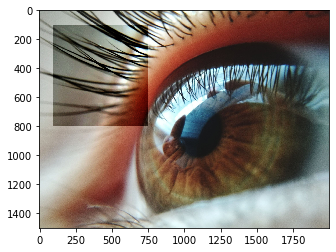

In [8]:
image = plt.imread(im_path)
image = image/255.

image[100:800, 100:750, :] = np.power(image[100:800, 100:750, :], 3)

plt.imshow(image)
plt.show()